# Simple Linear Regression

#### Predict the percentage of the students based on no. of study hrs.This is a simple linear regression task as it involves just 2 variables.

#### What will be the predicted score if student studies for 9.25 hrs/day?

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
student=pd.read_csv('http://bit.ly/w-data')

In [97]:
student.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's see the dtypes of the columns.

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in a data.

### Plotting a graph

Text(0.5, 1.0, 'Hours Vs percentage')

<Figure size 576x576 with 0 Axes>

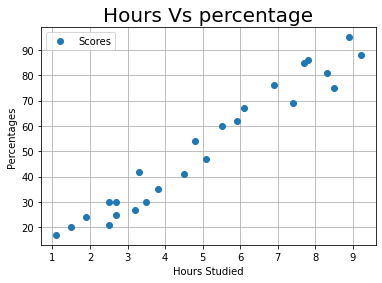

In [13]:
plt.figure(figsize=(8,8))
student.plot(x='Hours',y='Scores',style='o')
plt.grid()
plt.xlabel('Hours Studied')
plt.ylabel('Percentages')
plt.title('Hours Vs percentage',size=20)

### Train-Test split

In [52]:
X = student.iloc[:, :-1].values  
y = student.iloc[:, 1].values 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=5)

### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
LR=LinearRegression()

In [57]:
LR.fit(X_train,y_train)

LinearRegression()

In [58]:
LR.coef_

array([9.60498629])

In [59]:
LR.intercept_

3.0980408893375113

In [65]:
R2=LR.score(X_train,y_train)

# Adjusted R-square
N= X_train.shape[0]
K= X_train.shape[1]

adj_R= 1 - (1- R2) * ( N-1 ) / ( N-K-1 )
print('R-square:\n',R2,'\n')

print('Adjusted R-square:\n',adj_R)



R-square:
 0.9583509805345388 

Adjusted R-square:
 0.956037146119791


### Predictions

In [66]:
pred_y_train=LR.predict(X_train)
pred_y_test= LR.predict(X_test)

In [116]:
pred_y_test

array([74.17493942, 61.68845724, 33.83399701, 77.0564353 , 49.20197507])

### Error Train & Test

In [68]:
error_train= y_train -pred_y_train

error_test= y_test -pred_y_test

In [69]:
error_train

array([ 2.65248516,  7.98306607, -5.32047918, -4.59698878,  2.49447968,
       -5.08347095,  0.96849613,  7.20550436, -6.11050661,  2.23254002,
        6.62755373,  4.07453453, -6.7154929 , -1.81942707, -4.03150387,
        2.88949339, -3.46391473,  6.41758115,  3.33647419, -9.74042433])

In [71]:
error_test.mean()

1.208839192604445

In [72]:
pred_actual=pd.DataFrame({ 'Pred': pred_y_train, 'Actual': y_train})

In [73]:
import seaborn as sns

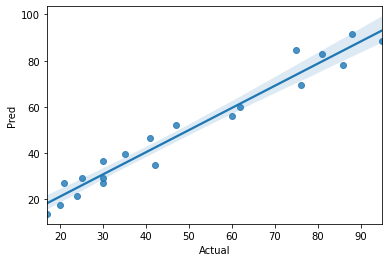

In [74]:
sns.regplot(pred_actual.Actual , pred_actual.Pred)

## What will be the predicted score if student studies for 9.25 hrs/day?

In [145]:
hour=[[9.25]]

In [146]:
pred= LR.predict(hour)
pred

array([91.94416405])

#### Predicted score is around 91.94% if student studies for 9.25hrs/day.

### Metrices

In [75]:
MSE=np.mean(np.square(error_test))
RMSE=np.sqrt(MSE)
MAE=np.mean(np.abs(error_test))
MAPE=np.round(np.mean(np.abs(error_test*100/ y_test)))

In [83]:
print(' MSE:\t',MSE,'\n','RMSE:\t',RMSE,'\n','MAE:\t',MAE,'\n','MAPE:\t',MAPE)

 MSE:	 37.56345257951597 
 RMSE:	 6.1289030486308045 
 MAE:	 6.012413762390567 
 MAPE:	 12.0
